### From [TPM conventions](https://pyphi.readthedocs.io/en/latest/conventions.html)

In [1]:
import numpy as np
import pandas as pd
import pyphi
from pyphi.examples import basic_noisy_selfloop_network
from IPython.display import Image
import matplotlib.pyplot as plt

import pyphi.data_models as dm  # Prototype code
from collections import Counter

In [2]:
net = basic_noisy_selfloop_network()
tpm = net.tpm
net

Network([[[[0.271 0.19  0.244]
   [0.919 0.91  0.756]]

  [[0.919 0.91  0.756]
   [0.991 0.99  0.244]]]


 [[[0.919 0.19  0.756]
   [0.991 0.91  0.244]]

  [[0.991 0.91  0.244]
   [0.999 0.99  0.756]]]], cm=[[1 0 1]
 [1 1 1]
 [1 1 1]])

In [3]:
net.cm

array([[1, 0, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [4]:
net.node_labels

NodeLabels(('n0', 'n1', 'n2'))

In [5]:
N = len(net.node_labels)
N

3

In [6]:
tpm.shape

(2, 2, 2, 3)

In [7]:
tpm

array([[[[0.271, 0.19 , 0.244],
         [0.919, 0.91 , 0.756]],

        [[0.919, 0.91 , 0.756],
         [0.991, 0.99 , 0.244]]],


       [[[0.919, 0.19 , 0.756],
         [0.991, 0.91 , 0.244]],

        [[0.991, 0.91 , 0.244],
         [0.999, 0.99 , 0.756]]]])

State-by-State form is 2^N x 2^N  (2=number of states per node)

In [8]:
sbn = tpm
sbs = pyphi.convert.sbn2sbs(tpm)
sbs.shape

(8, 8)

In [9]:
pd.DataFrame(sbs)

,0,1,2,3,4,5,6,7
0,0.446410,0.165950,0.104714,0.038926,0.144080,0.053560,0.033796,0.012564
1,0.016009,0.181631,0.003755,0.042605,0.049601,0.562759,0.011635,0.132005
2,0.001779,0.020181,0.017985,0.204055,0.005511,0.062529,0.055725,0.632235
3,0.000612,0.067428,0.006192,0.681768,0.000198,0.021762,0.001998,0.220042
4,0.001779,0.020181,0.017985,0.204055,0.005511,0.062529,0.055725,0.632235
5,0.000612,0.067428,0.006192,0.681768,0.000198,0.021762,0.001998,0.220042
6,0.000068,0.007492,0.006736,0.741704,0.000022,0.002418,0.002174,0.239386
7,0.000002,0.002438,0.000242,0.241318,0.000008,0.007552,0.000748,0.747692


In [10]:
# New version of Legacy Network
n2 = dm.Network()
n2.from_legacy(net)
n2

Network(-7ffff8046c61a1bd): node_connectivity: (3, 3), transitions: (8, 8)

In [11]:
n2.tpm

,000,001,010,011,100,101,110,111
000,0.446410,0.165950,0.104714,0.038926,0.144080,0.053560,0.033796,0.012564
001,0.016009,0.181631,0.003755,0.042605,0.049601,0.562759,0.011635,0.132005
010,0.001779,0.020181,0.017985,0.204055,0.005511,0.062529,0.055725,0.632235
011,0.000612,0.067428,0.006192,0.681768,0.000198,0.021762,0.001998,0.220042
100,0.001779,0.020181,0.017985,0.204055,0.005511,0.062529,0.055725,0.632235
101,0.000612,0.067428,0.006192,0.681768,0.000198,0.021762,0.001998,0.220042
110,0.000068,0.007492,0.006736,0.741704,0.000022,0.002418,0.002174,0.239386
111,0.000002,0.002438,0.000242,0.241318,0.000008,0.007552,0.000748,0.747692


### The following acts roughly like [state-by-node form](https://pyphi.readthedocs.io/en/latest/conventions.html#multidimensional-state-by-node-form)
But, instead of being high dimensional, its 2 dimensions. Indexed by state given as tuple.

In [12]:
n2.tpm.loc[['010']]  # get one row

,000,001,010,011,100,101,110,111
010,0.001779,0.020181,0.017985,0.204055,0.005511,0.062529,0.055725,0.632235


In [13]:
n2.tpm.loc[['010']].to_numpy()  # get one row

array([[0.00177876, 0.02018124, 0.01798524, 0.20405476, 0.00551124,
        0.06252876, 0.05572476, 0.63223524]])

In [14]:
n2.tpm.to_numpy()

array([[4.4641044e-01, 1.6594956e-01, 1.0471356e-01, 3.8926440e-02,
        1.4407956e-01, 5.3560440e-02, 3.3796440e-02, 1.2563560e-02],
       [1.6008840e-02, 1.8163116e-01, 3.7551600e-03, 4.2604840e-02,
        4.9601160e-02, 5.6275884e-01, 1.1634840e-02, 1.3200516e-01],
       [1.7787600e-03, 2.0181240e-02, 1.7985240e-02, 2.0405476e-01,
        5.5112400e-03, 6.2528760e-02, 5.5724760e-02, 6.3223524e-01],
       [6.1236000e-04, 6.7427640e-02, 6.1916400e-03, 6.8176836e-01,
        1.9764000e-04, 2.1762360e-02, 1.9983600e-03, 2.2004164e-01],
       [1.7787600e-03, 2.0181240e-02, 1.7985240e-02, 2.0405476e-01,
        5.5112400e-03, 6.2528760e-02, 5.5724760e-02, 6.3223524e-01],
       [6.1236000e-04, 6.7427640e-02, 6.1916400e-03, 6.8176836e-01,
        1.9764000e-04, 2.1762360e-02, 1.9983600e-03, 2.2004164e-01],
       [6.8040000e-05, 7.4919600e-03, 6.7359600e-03, 7.4170404e-01,
        2.1960000e-05, 2.4180400e-03, 2.1740400e-03, 2.3938596e-01],
       [2.4400000e-06, 2.4375600e-03, 2.4

In [15]:
n2.cm

,n0,n1,n2
n0,1,0,1
n1,1,1,1
n2,1,1,1


In [16]:
# Make TPM for 3 inputs, 1 ouput
probs = np.array([[0.68893508, 0.40176953],
                      [0.44095309, 0.84035902],
                      [0.09975545, 0.58225631],
                      [0.86475645, 0.18650795],
                      [0.50721989, 0.86299773],
                      [0.62045787, 0.90525779],
                      [0.88270204, 0.46225991],
                      [0.51548114, 0.89159624]])
probs

array([[0.68893508, 0.40176953],
       [0.44095309, 0.84035902],
       [0.09975545, 0.58225631],
       [0.86475645, 0.18650795],
       [0.50721989, 0.86299773],
       [0.62045787, 0.90525779],
       [0.88270204, 0.46225991],
       [0.51548114, 0.89159624]])

In [17]:
tp = dm.TransProb(list('ABC'),list('D'),probs)
tp.df

,0,1
000,0.688935,0.401770
001,0.440953,0.840359
010,0.099755,0.582256
011,0.864756,0.186508
100,0.507220,0.862998
101,0.620458,0.905258
110,0.882702,0.462260
111,0.515481,0.891596


In [18]:
print(f'in_nodes={tp.in_nodes}')
print(f'out_nodes={tp.out_nodes}')

in_nodes=['A', 'B', 'C']
out_nodes=['D']


## Play with following states

In [19]:
sqtpm = n2._tp
allstates = list(sqtpm.df.index)
sqtpm.df

,000,001,010,011,100,101,110,111
000,0.446410,0.165950,0.104714,0.038926,0.144080,0.053560,0.033796,0.012564
001,0.016009,0.181631,0.003755,0.042605,0.049601,0.562759,0.011635,0.132005
010,0.001779,0.020181,0.017985,0.204055,0.005511,0.062529,0.055725,0.632235
011,0.000612,0.067428,0.006192,0.681768,0.000198,0.021762,0.001998,0.220042
100,0.001779,0.020181,0.017985,0.204055,0.005511,0.062529,0.055725,0.632235
101,0.000612,0.067428,0.006192,0.681768,0.000198,0.021762,0.001998,0.220042
110,0.000068,0.007492,0.006736,0.741704,0.000022,0.002418,0.002174,0.239386
111,0.000002,0.002438,0.000242,0.241318,0.000008,0.007552,0.000748,0.747692


#### Eliminate low probability edges and look at graph
Represents above matrix

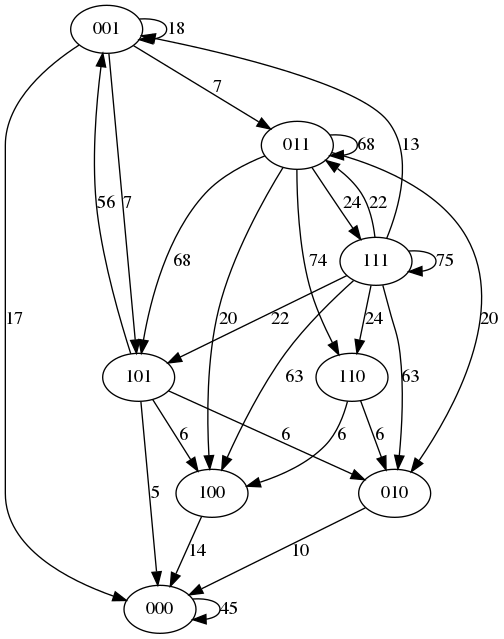

In [20]:
sqtpm.graph(pngfile='tpm.png', min_prob=0.05)
Image(filename='tpm.png') 

#### Tranisition probabilities starting at state 001

In [21]:
sqtpm.df['001']

000    0.165950
001    0.181631
010    0.020181
011    0.067428
100    0.020181
101    0.067428
110    0.007492
111    0.002438
Name: 001, dtype: float64

#### Look at actual counts of transitions starting at 001
These should roughly match the probabilities above

In [22]:
c = Counter(sqtpm.next_state(current='001') for i in range(1000))
c.most_common()

[('001', 340),
 ('000', 312),
 ('101', 144),
 ('011', 122),
 ('100', 36),
 ('010', 35),
 ('110', 6),
 ('111', 5)]

#### Start at given state and track a bunch of transitions

In [23]:
sqtpm.set_state('001')
[sqtpm.next_state() for i in range(10)]

['000', '000', '000', '000', '000', '000', '000', '000', '000', '000']

In [24]:
sqtpm.set_state('011')
[sqtpm.next_state() for i in range(10)]

['011', '110', '010', '000', '000', '000', '000', '000', '001', '101']

#### Trace transitions using all possible starting points

In [25]:
tt = dict([(s,[sqtpm.next_state(current=s) for i in range(10)]) for s in list(allstates)])
tt

{'000': ['000', '000', '000', '000', '000', '000', '000', '000', '000', '000'],
 '001': ['001', '000', '000', '000', '101', '011', '001', '011', '001', '000'],
 '010': ['000', '000', '000', '010', '000', '011', '000', '101', '100', '000'],
 '011': ['110', '011', '110', '101', '111', '101', '011', '010', '011', '110'],
 '100': ['001', '000', '000', '001', '001', '000', '000', '000', '000', '000'],
 '101': ['001', '001', '000', '000', '010', '100', '001', '001', '001', '001'],
 '110': ['100', '010', '010', '100', '000', '000', '010', '001', '010', '010'],
 '111': ['010', '101', '001', '111', '111', '111', '111', '011', '010', '111']}

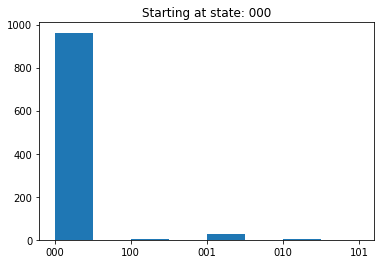

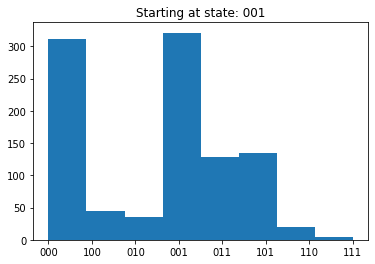

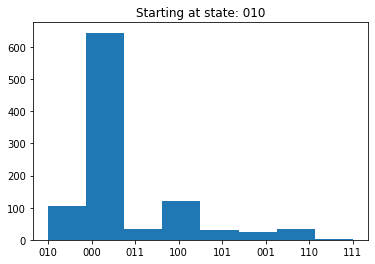

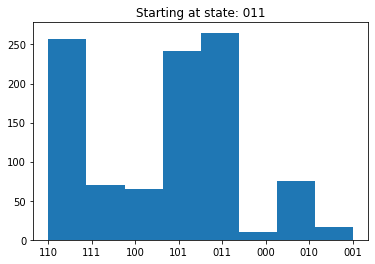

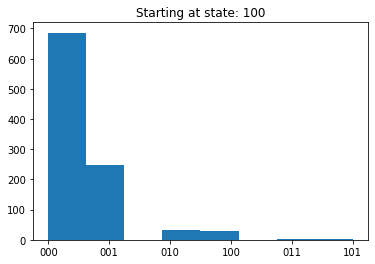

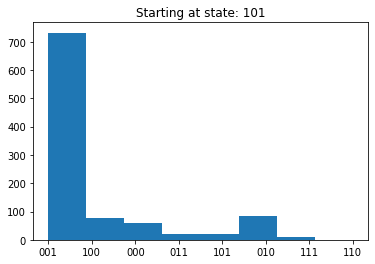

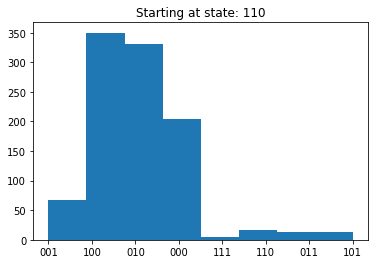

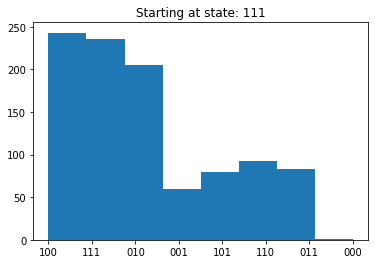

In [26]:
many = dict([(s,[sqtpm.next_state(current=s) for i in range(1000)]) for s in list(allstates)])
for start in allstates:
    plt.figure()
    plt.title(f'Starting at state: {start}')
    plt.hist(many[start], bins=len(allstates))